In [444]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [445]:
madden_df = pd.read_csv('data2023/actualmaddenratings.csv')
madden_df.head()

,#,Team,Position,Archetype,Jersey #,Unnamed: 5,Last Name,Age,Height,Weight,...,Years Pro,Handedness,College,Portrait ID,Team ID,Primary Key,Full Name,Player Asset,Iteration,Status
0,1,Packers,WR,WR_RouteRunner,17,Davante,Adams,28,73,215,...,7,Right,Fresno State,6328,20,10823,Davante Adams,AdamsDavante_10823,launch-ratings,published
1,2,Chiefs,QB,QB_Improviser,15,Patrick,Mahomes,25,75,230,...,4,Right,Texas Tech,8648,9,12635,Patrick Mahomes,MahomesIIPatrick_12635,launch-ratings,published
2,3,Chiefs,TE,TE_VerticalThreat,87,Travis,Kelce,31,77,260,...,8,Right,Cincinnati,5920,9,890,Travis Kelce,KelceTravis_890,launch-ratings,published
3,4,Rams,RE,DE_PowerRusher,99,Aaron,Donald,30,73,280,...,7,Right,Pittsburgh,6394,24,10852,Aaron Donald,DonaldAaron_10852,launch-ratings,published
4,5,Rams,CB,CB_MantoMan,5,Jalen,Ramsey,26,73,208,...,5,Right,Florida State,8185,24,17538,Jalen Ramsey,RamseyJalen_17538,launch-ratings,published


In [446]:
madden_df.columns

Index(['#', 'Team', 'Position', 'Archetype', 'Jersey #', 'Unnamed: 5',
       'Last Name', 'Age', 'Height', 'Weight', 'Overall', 'Speed',
       'Acceleration', 'Agility', 'Change of Dir', 'Strength', 'Jumping',
       'Awareness', 'Carrying', 'Break Tackle', 'Juke Move', 'Spin Move',
       'Trucking', 'Stiff Arm', 'BC Vision', 'Catching', 'Catch In Traffic',
       'Spec Catch', 'Release', 'Short RR', 'Medium RR', 'Deep RR',
       'Throw Power', 'Throw Acc Short', 'Throw Acc Mid', 'Throw Acc Deep',
       'Throw Under Pressure', 'Throw On The Run', 'Play Action', 'Break Sack',
       'Run Block', 'Run Block Power', 'Run Block Finesse', 'Pass Block',
       'Pass Block Power', 'Pass Block Finesse', 'Impact Blocking',
       'Lead Blocking', 'Tackle', 'Hit Power', 'Pursuit', 'Man Coverage',
       'Zone Coverage', 'Press', 'Play Recognition', 'Power Moves',
       'Finesse Moves', 'Block Shedding', 'Kick Power', 'Kick Accuracy',
       'Kick Return', 'Stamina', 'Injury', 'Toughness', 

### Keeping non-categorical columns that make sense

In [447]:
feature_columns = ['Position', 'Age', 'Height', 'Weight', 'Overall', 'Speed',
 'Acceleration', 'Agility', 'Change of Dir', 'Strength', 'Jumping',
 'Awareness', 'Carrying', 'Break Tackle', 'Juke Move', 'Spin Move',
 'Trucking', 'Stiff Arm', 'BC Vision', 'Catching', 'Catch In Traffic',
 'Spec Catch', 'Release', 'Short RR', 'Medium RR', 'Deep RR',
 'Throw Power', 'Throw Acc Short', 'Throw Acc Mid', 'Throw Acc Deep',
 'Throw Under Pressure', 'Throw On The Run', 'Play Action', 'Break Sack',
 'Run Block', 'Run Block Power', 'Run Block Finesse', 'Pass Block',
 'Pass Block Power', 'Pass Block Finesse', 'Impact Blocking',
 'Lead Blocking', 'Tackle', 'Hit Power', 'Pursuit', 'Man Coverage',
 'Zone Coverage', 'Press', 'Play Recognition', 'Power Moves',
 'Finesse Moves', 'Block Shedding', 'Kick Power', 'Kick Accuracy',
 'Kick Return', 'Stamina', 'Injury', 'Toughness', 'Years Pro']

feature_df = madden_df.drop(madden_df.columns.difference(feature_columns), axis='columns')
feature_df

,Position,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
0,WR,28,73,215,99,91,92,92,92,63,...,10,10,52,25,30,45,96,93,88,7
1,QB,25,75,230,99,81,87,88,87,70,...,10,10,24,20,10,10,96,95,96,4
2,TE,31,77,260,99,86,89,86,75,79,...,20,20,40,35,32,6,97,89,91,8
3,RE,30,73,280,99,82,90,86,68,99,...,99,97,97,25,21,10,87,98,93,7
4,CB,26,73,208,99,92,94,91,92,71,...,35,41,50,18,17,80,91,86,86,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,RE,26,74,296,59,73,81,56,52,84,...,60,68,60,17,14,9,72,81,83,3
2076,TE,24,76,257,59,74,84,74,68,76,...,10,10,32,15,12,30,81,87,79,1
2077,FS,25,73,188,58,86,90,90,89,55,...,33,42,48,15,11,53,89,83,77,3
2078,CB,22,70,203,58,88,87,85,80,64,...,39,46,48,10,11,50,88,84,79,0


In [448]:
position = feature_df['Position'].unique()[1]
positions = feature_df['Position'].unique()
positions


array(['WR', 'QB', 'TE', 'RE', 'CB', 'RG', 'HB', 'LOLB', 'LT', 'LG', 'SS',
       'LE', 'DT', 'MLB', 'C', 'FS', 'RT', 'K', 'FB', 'P', 'ROLB'],
      dtype=object)

In [449]:
players_df = feature_df.loc[feature_df['Position'] == position]
players_df

,Position,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
1,QB,25,75,230,99,81,87,88,87,70,...,10,10,24,20,10,10,96,95,96,4
12,QB,44,76,225,97,59,66,70,65,64,...,10,10,33,18,17,10,99,99,96,21
15,QB,37,74,225,96,79,84,81,79,59,...,10,10,19,15,18,10,97,91,98,16
33,QB,32,71,215,94,85,91,92,89,59,...,10,10,16,10,19,10,98,98,98,9
52,QB,24,74,212,91,96,96,95,95,63,...,12,10,16,12,19,10,92,92,96,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,QB,26,73,216,61,89,89,82,80,70,...,10,10,22,22,24,10,84,88,90,1
1992,QB,34,73,210,61,74,83,75,71,46,...,10,10,27,30,32,10,73,86,83,11
2019,QB,24,73,224,61,85,88,91,87,65,...,10,10,23,29,30,10,79,93,90,2
2028,QB,23,72,210,61,84,83,83,84,58,...,10,10,21,58,52,31,80,91,83,0


### Fitting to 6 components explains about 70% of the variance

In [450]:
pca = PCA(n_components=6)
pca.fit(players_df.drop(['Position'], axis='columns'))

PCA(n_components=6)

Text(0, 0.5, 'Cumulative explained variance')

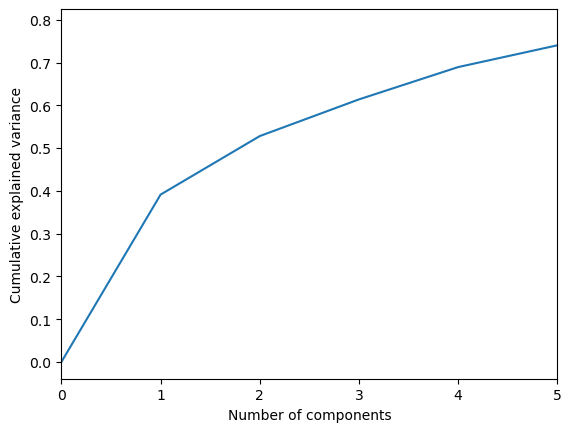

In [451]:
plt.plot(np.r_[[0],np.cumsum(pca.explained_variance_ratio_)])
plt.xlim(0, pca.n_components_ - 1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [452]:
components = pd.DataFrame(pca.components_, columns = players_df.drop(['Position'], axis='columns').columns, index=range(1, pca.n_components_ + 1))
components

,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,Jumping,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
1,-0.009623,-0.005447,0.001628,0.052946,0.091617,0.059934,0.106835,0.098988,0.093194,0.093861,...,0.056726,0.070399,0.089985,0.098235,0.072736,0.136847,0.059876,-0.018132,0.033923,-0.015023
2,0.030693,0.016640,0.016825,-0.218138,-0.075481,-0.066633,-0.129286,-0.132548,-0.028978,-0.010797,...,0.083172,0.115588,0.089363,0.272235,0.201901,0.170787,-0.144575,-0.056064,-0.086912,0.009682
3,0.153728,0.016779,0.092549,0.353910,-0.146824,-0.106736,-0.118602,-0.103547,0.018286,-0.073648,...,0.018549,0.021085,0.034898,-0.088458,-0.037617,-0.044124,0.175304,0.053969,0.101931,0.149940
4,0.020228,-0.048106,-0.339044,0.017607,0.044632,0.048104,0.076380,0.111774,-0.244339,0.004035,...,-0.036090,-0.036913,-0.204162,-0.164012,-0.079276,-0.088115,-0.016160,0.007389,-0.011752,0.016287
5,0.019992,0.007019,-0.009168,0.124132,0.024189,0.000848,0.040238,0.018234,-0.033806,0.032322,...,-0.031826,-0.062703,-0.035261,0.646364,0.564587,-0.068698,0.069492,-0.019979,0.045420,0.021270
6,-0.040246,-0.042580,-0.348884,0.049218,0.079481,0.063994,0.079832,0.114059,-0.170753,-0.011337,...,0.130440,0.172895,0.016476,0.029736,0.023322,0.283759,0.075607,-0.003896,-0.033621,-0.045598


### Takes the index of the component with the largest absolute 'Overall' value

In [453]:
print(components['Overall'])
component_index = components['Overall'].abs().argmax() + 1
component_index

1    0.052946
2   -0.218138
3    0.353910
4    0.017607
5    0.124132
6    0.049218
Name: Overall, dtype: float64


3

### Print out the columns that correlate positively/negatively with positive/negative 'Overall' value

In [454]:
if components['Overall'][component_index] >= 0: 
    print('Positive influence:')
    print(components.loc[component_index].sort_values(ascending=False).head(10))
    print('Negative influence:')
    print(components.loc[component_index].sort_values(ascending=True).head(10))
elif components['Overall'][component_index] < 0: 
    print('Positive influence:')
    print(components.loc[component_index].sort_values(ascending=True).head(10))
    print('Negative influence:')
    print(components.loc[component_index].sort_values(ascending=False).head(10))

Positive influence:
Awareness               0.390570
Overall                 0.353910
Play Action             0.236521
Throw Acc Mid           0.226793
Throw Acc Deep          0.207091
Throw Under Pressure    0.202418
Throw Acc Short         0.179166
Stamina                 0.175304
Age                     0.153728
Throw On The Run        0.153356
Name: 3, dtype: float64
Negative influence:
Spin Move       -0.260625
Juke Move       -0.180799
BC Vision       -0.154362
Speed           -0.146824
Trucking        -0.135862
Agility         -0.118602
Break Tackle    -0.106905
Acceleration    -0.106736
Stiff Arm       -0.104288
Change of Dir   -0.103547
Name: 3, dtype: float64
